In [1]:
from nba_py.constants import CURRENT_SEASON
print(CURRENT_SEASON)

2016-17


In [2]:
%pylab inline 
#allows you to plot in jupyter notebook

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
from nba_py import player

## Search Player

In [5]:
playerid=player.get_player(first_name='Lebron', last_name='James')

## Pick Season

In [6]:
season='2017-18'

#### Name look up

In [7]:
name=player.PlayerSummary(playerid).info()['DISPLAY_FIRST_LAST'][0]

#### team lookup

In [8]:
team_id=player.PlayerSummary(playerid).info()['TEAM_ID'][0]

#### Set object pst equal to the player shot tracking module

In [9]:
pst=player.PlayerShotTracking(playerid, 
                          team_id=0, 
                          measure_type='Base', 
                          per_mode='PerGame', 
                          plus_minus='N', 
                          pace_adjust='N', 
                          rank='N', 
                          league_id='00', 
                          season=season, season_type='Regular Season',
                          po_round='0', outcome='', location='', 
                          month='0', season_segment='', 
                          date_from='', date_to='', 
                          opponent_team_id='0', 
                          vs_conference='', vs_division='', 
                          game_segment='', period='0', 
                          shot_clock_range='', last_n_games='0')

## Import team level stats for comparison, no need to enter team id if it's the same as the player

In [10]:
from nba_py import team
tst=team.TeamShotTracking(team_id, season=season)

In [11]:
team.TeamCommonRoster(team_id).roster()

,TeamID,SEASON,LeagueID,PLAYER,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID
0,1610612739,2016,00,Kevin Love,0,F,6-10,251,"SEP 07, 1988",28.0,8,UCLA,201567
1,1610612739,2016,00,James Jones,1,G-F,6-8,218,"OCT 04, 1980",36.0,13,Miami (FL),2592
2,1610612739,2016,00,Kyrie Irving,2,G,6-3,193,"MAR 23, 1992",25.0,5,Duke,202681
3,1610612739,2016,00,Derrick Williams,3,F,6-8,240,"MAY 25, 1991",26.0,5,Arizona,202682
4,1610612739,2016,00,Iman Shumpert,4,G,6-5,220,"JUN 26, 1990",27.0,5,Georgia Tech,202697
5,1610612739,2016,00,JR Smith,5,G,6-6,225,"SEP 09, 1985",31.0,12,St. Benedict's Prep (NJ),2747
6,1610612739,2016,00,Channing Frye,8,F,6-11,255,"MAY 17, 1983",34.0,10,Arizona,101112
7,1610612739,2016,00,Tristan Thompson,13,C,6-9,238,"MAR 13, 1991",26.0,5,Texas,202684
8,1610612739,2016,00,Kay Felder,20,G,5-9,176,"MAR 29, 1995",22.0,R,Oakland,1627770
9,1610612739,2016,00,LeBron James,23,F,6-8,250,"DEC 30, 1984",32.0,13,St. Vincent-St. Mary HS (OH),2544


#### Shots by Type

In [12]:
ShotsByType=pst.general_shooting().set_index('SHOT_TYPE')
ShotsByTime=pst.touch_time_shooting().set_index('TOUCH_TIME_RANGE')
ShotsByDefense=pst.closest_defender_shooting().set_index('CLOSE_DEF_DIST_RANGE')

In [13]:
#ShotsByTypeTeam=tst.general_shooting().set_index('SHOT_TYPE')
ShotsByTimeTeam=tst.touch_time_shooting().set_index('TOUCH_TIME_RANGE')
ShotsByDefenseTeam=tst.closest_defender_shooting().set_index('CLOSE_DEF_DIST_RANGE')

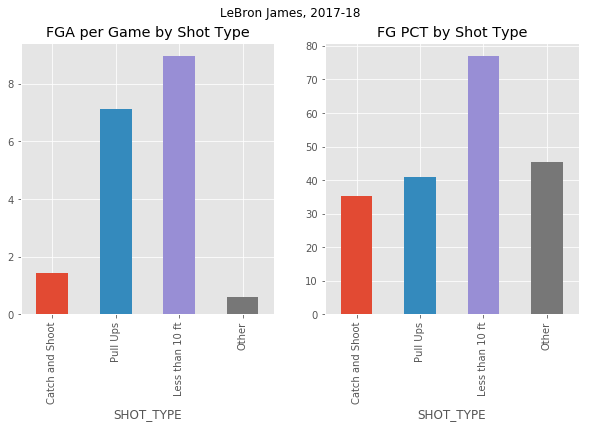

In [14]:
plt.suptitle(name + ', ' + season)
plt.subplot(121)
ShotsByType['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA per Game by Shot Type')
plt.subplot(122)
(ShotsByType['FG_PCT']*100).plot(kind='bar', figsize=(10,5), title='FG PCT by Shot Type')

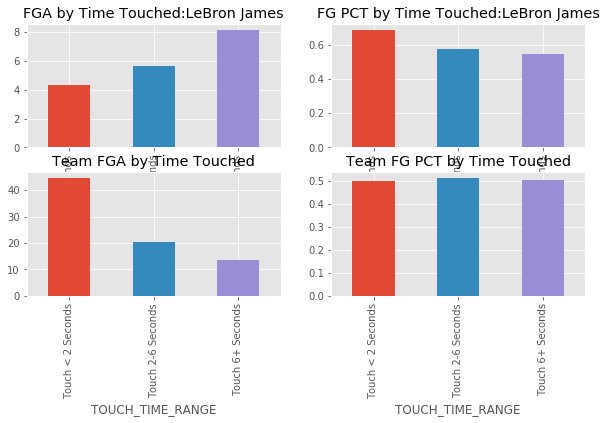

In [15]:
plt.subplot(221)
ShotsByTime['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA by Time Touched:' + name )
plt.subplot(222)
ShotsByTime['FG_PCT'].plot(kind='bar', figsize=(10,5), title='FG PCT by Time Touched:' + name )
plt.subplot(223)
ShotsByTimeTeam['FGA'].plot(kind='bar', figsize=(10,5),  title='Team FGA by Time Touched' )
plt.subplot(224)
ShotsByTimeTeam['FG_PCT'].plot(kind='bar', figsize=(10,5), title='Team FG PCT by Time Touched' )

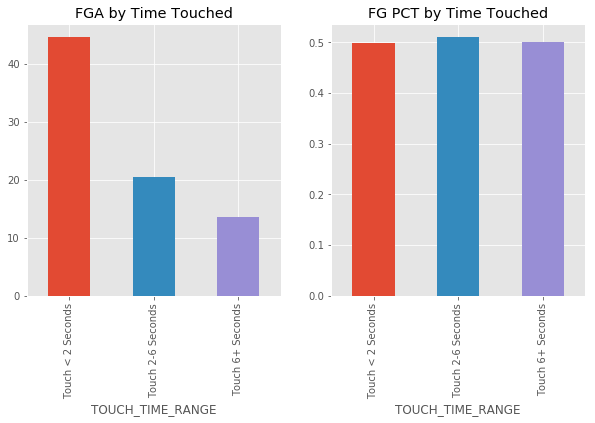

In [16]:
ShotsByTime=tst.touch_time_shooting().set_index('TOUCH_TIME_RANGE')
plt.subplot(121)
ShotsByTime['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA by Time Touched' )
plt.subplot(122)
ShotsByTime['FG_PCT'].plot(kind='bar', figsize=(10,5), title='FG PCT by Time Touched' )

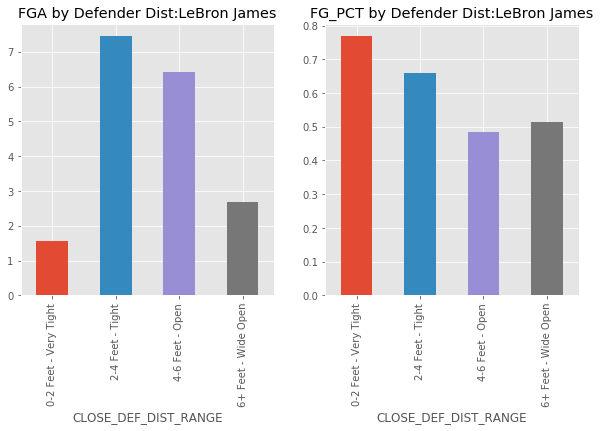

In [17]:
plt.subplot(121)
ShotsByDefense['FGA'].plot(kind='bar', figsize=(10,5),  title='FGA by Defender Dist:' + name )
plt.subplot(122)
ShotsByDefense['FG_PCT'].plot(kind='bar', figsize=(10,5), title='FG_PCT by Defender Dist:' + name )